In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


617

In [6]:
# Get the City Weather Data

In [7]:
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=228f2a59dd4bc89541dbd4e0d5a6b446


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | vardo
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | hermanus
Processing Record 4 of Set 13 | pisco
Processing Record 5 of Set 13 | jiuquan
Processing Record 6 of Set 13 | port blair
Processing Record 7 of Set 13 | petropavl
Processing Record 8 of Set 13 | albany
Processing Record 9 of Set 13 | punta arenas
Processing Record 10 of Set 13 | tyrma
Processing Record 11 of Set 13 | vaini
Processing Record 12 of Set 13 | bredasdorp
Processing Record 13 of Set 13 | esperance
Processing Record 14 of Set 13 | tarudant
City not found. Skipping...
Processing Record 15 of Set 13 | san cristobal
Processing Record 16 of Set 13 | vila franca do campo
Processing Record 17 of Set 13 | chesapeake
Processing Record 18 of Set 13 | tazovskiy
Processing Record 19 of Set 13 | wajima
Processing Record 20 of Set 13 | bambous virieux
Processing Record 21 of Set 13 | zaozerne
Processing Record 22 of Set 13 | hobart
Processing Record 23 of Set 13 | patos d

Processing Record 32 of Set 16 | taseyevo
Processing Record 33 of Set 16 | burica
City not found. Skipping...
Processing Record 34 of Set 16 | mehamn
Processing Record 35 of Set 16 | half moon bay
Processing Record 36 of Set 16 | zhuzhou
Processing Record 37 of Set 16 | amlame
Processing Record 38 of Set 16 | villarrubia de los ojos
Processing Record 39 of Set 16 | sao filipe
Processing Record 40 of Set 16 | ahipara
Processing Record 41 of Set 16 | chokurdakh
Processing Record 42 of Set 16 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 16 | georgetown
Processing Record 44 of Set 16 | songjianghe
Processing Record 45 of Set 16 | umm lajj
Processing Record 46 of Set 16 | makakilo city
Processing Record 47 of Set 16 | sola
Processing Record 48 of Set 16 | palauig
Processing Record 49 of Set 16 | oskarshamn
Processing Record 50 of Set 16 | bahir dar
Processing Record 1 of Set 17 | ternate
Processing Record 2 of Set 17 | karratha
Processing Record 3 of Set 17 | hualma

City not found. Skipping...
Processing Record 21 of Set 20 | ribnitz-damgarten
Processing Record 22 of Set 20 | feijo
Processing Record 23 of Set 20 | changqing
Processing Record 24 of Set 20 | kousseri
Processing Record 25 of Set 20 | kamenskoye
City not found. Skipping...
Processing Record 26 of Set 20 | kincardine
Processing Record 27 of Set 20 | wichian buri
Processing Record 28 of Set 20 | williams lake
Processing Record 29 of Set 20 | port augusta
Processing Record 30 of Set 20 | nantucket
Processing Record 31 of Set 20 | peace river
Processing Record 32 of Set 20 | mayo
Processing Record 33 of Set 20 | valverde del camino
Processing Record 34 of Set 20 | ouallam
Processing Record 35 of Set 20 | paraguacu paulista
Processing Record 36 of Set 20 | marsala
Processing Record 37 of Set 20 | sergeyevka
Processing Record 38 of Set 20 | novoagansk
Processing Record 39 of Set 20 | caravelas
Processing Record 40 of Set 20 | veraval
Processing Record 41 of Set 20 | pangnirtung
Processing R

Processing Record 1 of Set 24 | andenes
Processing Record 2 of Set 24 | ucluelet
Processing Record 3 of Set 24 | aldan
Processing Record 4 of Set 24 | bairiki
Processing Record 5 of Set 24 | belmonte
Processing Record 6 of Set 24 | sarahan
Processing Record 7 of Set 24 | namtsy
Processing Record 8 of Set 24 | chimbote
Processing Record 9 of Set 24 | daru
Processing Record 10 of Set 24 | kuyanovo
Processing Record 11 of Set 24 | san quintin
Processing Record 12 of Set 24 | husavik
Processing Record 13 of Set 24 | natal
Processing Record 14 of Set 24 | domoni
Processing Record 15 of Set 24 | kieta
Processing Record 16 of Set 24 | pulandian
Processing Record 17 of Set 24 | ola
Processing Record 18 of Set 24 | zhaotong
Processing Record 19 of Set 24 | kuala terengganu
Processing Record 20 of Set 24 | inskoy
Processing Record 21 of Set 24 | tuatapere
Processing Record 22 of Set 24 | kongolo
Processing Record 23 of Set 24 | kumluca
Processing Record 24 of Set 24 | veinticinco de mayo
Process

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardo,70.3705,31.1107,43.00,75,75,3.44,NO,2021-09-16 15:11:12
1,Ushuaia,-54.8000,-68.3000,37.02,59,100,2.21,AR,2021-09-16 15:11:13
2,Hermanus,-34.4187,19.2345,61.81,61,100,8.41,ZA,2021-09-16 15:11:15
3,Pisco,-13.7000,-76.2167,65.01,77,90,5.75,PE,2021-09-16 15:11:17
4,Jiuquan,39.7432,98.5174,71.44,25,100,6.40,CN,2021-09-16 15:11:17
5,Port Blair,11.6667,92.7500,77.74,85,100,7.43,IN,2021-09-16 15:08:44
6,Petropavl,54.8753,69.1628,57.81,46,74,9.93,KZ,2021-09-16 15:11:18
7,Albany,42.6001,-73.9662,70.38,74,58,4.79,US,2021-09-16 15:07:33
8,Punta Arenas,-53.1500,-70.9167,35.62,93,90,14.97,CL,2021-09-16 15:11:19
9,Tyrma,50.0833,132.1667,50.72,98,100,3.33,RU,2021-09-16 15:11:19


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-09-16 15:11:12,70.3705,31.1107,43.00,75,75,3.44
1,Ushuaia,AR,2021-09-16 15:11:13,-54.8000,-68.3000,37.02,59,100,2.21
2,Hermanus,ZA,2021-09-16 15:11:15,-34.4187,19.2345,61.81,61,100,8.41
3,Pisco,PE,2021-09-16 15:11:17,-13.7000,-76.2167,65.01,77,90,5.75
4,Jiuquan,CN,2021-09-16 15:11:17,39.7432,98.5174,71.44,25,100,6.40
5,Port Blair,IN,2021-09-16 15:08:44,11.6667,92.7500,77.74,85,100,7.43
6,Petropavl,KZ,2021-09-16 15:11:18,54.8753,69.1628,57.81,46,74,9.93
7,Albany,US,2021-09-16 15:07:33,42.6001,-73.9662,70.38,74,58,4.79
8,Punta Arenas,CL,2021-09-16 15:11:19,-53.1500,-70.9167,35.62,93,90,14.97
9,Tyrma,RU,2021-09-16 15:11:19,50.0833,132.1667,50.72,98,100,3.33


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

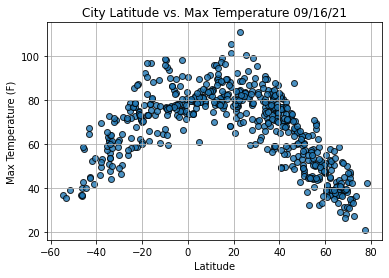

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

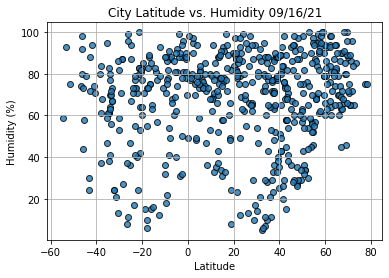

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


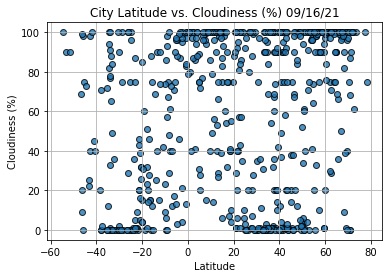

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

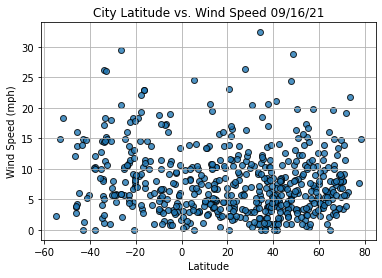

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                San Cristobal
Country                        VE
Date          2021-09-16 15:09:18
Lat                        7.7669
Lng                       -72.225
Max Temp                    84.38
Humidity                       47
Cloudiness                     15
Wind Speed                    8.1
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
559     True
560     True
561    False
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-09-16 15:11:12,70.3705,31.1107,43.00,75,75,3.44
4,Jiuquan,CN,2021-09-16 15:11:17,39.7432,98.5174,71.44,25,100,6.40
5,Port Blair,IN,2021-09-16 15:08:44,11.6667,92.7500,77.74,85,100,7.43
6,Petropavl,KZ,2021-09-16 15:11:18,54.8753,69.1628,57.81,46,74,9.93
7,Albany,US,2021-09-16 15:07:33,42.6001,-73.9662,70.38,74,58,4.79
...,...,...,...,...,...,...,...,...,...
558,Waterloo,CA,2021-09-16 15:11:10,43.4668,-80.5164,71.47,73,75,5.75
559,Praia Da Vitoria,PT,2021-09-16 15:11:14,38.7333,-27.0667,76.75,79,10,8.19
560,Esfahan,IR,2021-09-16 15:15:06,32.6572,51.6776,85.64,6,0,4.59
562,Srednekolymsk,RU,2021-09-16 15:15:07,67.4500,153.6833,36.59,72,100,5.75


In [25]:
# View first five rows
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-09-16 15:11:12,70.3705,31.1107,43.00,75,75,3.44
4,Jiuquan,CN,2021-09-16 15:11:17,39.7432,98.5174,71.44,25,100,6.40
5,Port Blair,IN,2021-09-16 15:08:44,11.6667,92.7500,77.74,85,100,7.43
6,Petropavl,KZ,2021-09-16 15:11:18,54.8753,69.1628,57.81,46,74,9.93
7,Albany,US,2021-09-16 15:07:33,42.6001,-73.9662,70.38,74,58,4.79


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

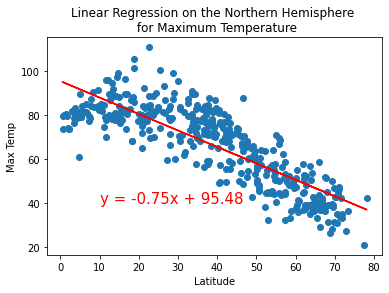

In [27]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

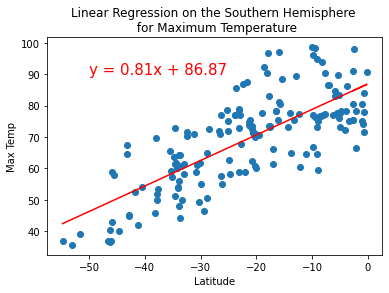

In [28]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

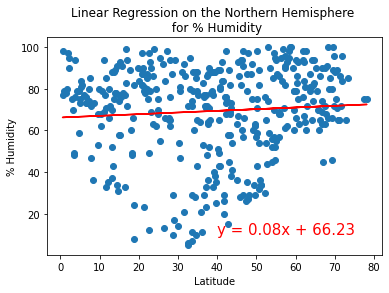

In [29]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

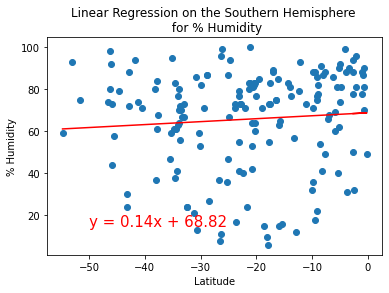

In [30]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

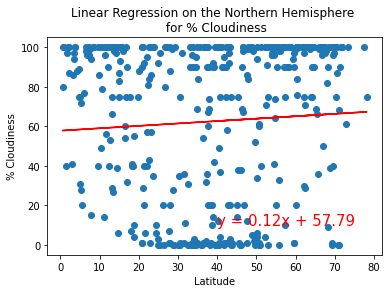

In [31]:
# Skill Drill
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

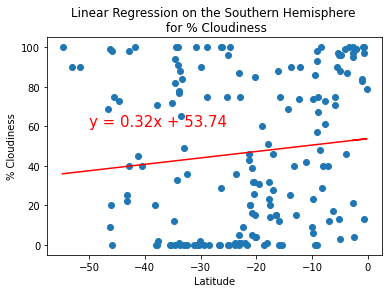

In [32]:
# Linear regression on the Southern Hemisphere % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

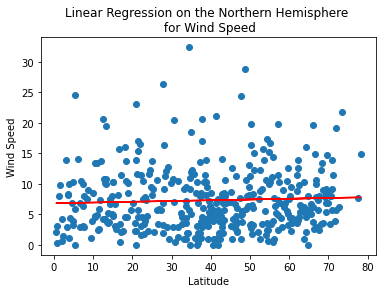

In [33]:
# WHY WON'T SHOW EQUATIONS ANYMORE?
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

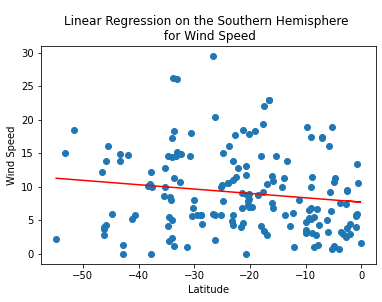

In [34]:
# WHY WON'T SHOW EQUATIONS ANYMORE?
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
